In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_read = pd.read_csv(mouse_drug_data_to_load)
clinical_read = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(clinical_read, mouse_read, how = "outer", on = "Mouse ID")

# Display the data table for preview
combined_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_by_two = combined_df.groupby(["Drug", "Timepoint"])

mean = grouped_by_two.mean()
tr_mean = mean[["Tumor Volume (mm3)"]]

# Convert to DataFrame
tr_mean = tr_mean.reset_index()

# Preview DataFrame
tr_mean.head(11)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sems = grouped_by_two.sem()

# Convert to DataFrame
tr_sems = sems[["Tumor Volume (mm3)"]]
tr_sems = tr_sems.reset_index()

# Preview DataFrame
tr_sems.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
tr_mean_table = tr_mean.pivot(values="Tumor Volume (mm3)", index="Timepoint", columns="Drug")
tr_mean_table


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [5]:
tr_sems_table = tr_sems.pivot(values="Tumor Volume (mm3)", index="Timepoint", columns="Drug")
tr_sems_table


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


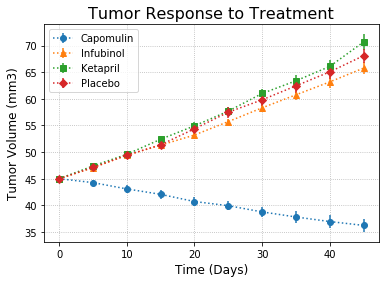

In [6]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()

ax.errorbar(tr_mean_table["Capomulin"].index, tr_mean_table["Capomulin"], yerr=tr_sems_table["Capomulin"], fmt="o",ls=":")
ax.errorbar(tr_mean_table["Infubinol"].index, tr_mean_table["Infubinol"], yerr=tr_sems_table["Infubinol"], fmt="^",ls=":")
ax.errorbar(tr_mean_table["Ketapril"].index, tr_mean_table["Ketapril"], yerr=tr_sems_table["Ketapril"], fmt="s",ls=":")
ax.errorbar(tr_mean_table["Placebo"].index, tr_mean_table["Placebo"], yerr=tr_sems_table["Placebo"], fmt="D",ls=":")

ax.set_xlabel("Time (Days)", fontsize=12)
ax.set_ylabel("Tumor Volume (mm3)", fontsize=12)
ax.set_title("Tumor Response to Treatment", fontsize=16)
ax.grid(linestyle=":")
plt.legend(("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=10)

# Save the Figure
plt.savefig("../Images/Tumor_Response_to_Treatment.png")


In [7]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint
# Convert to DataFrame
mt_mean = mean[["Metastatic Sites"]]

# Preview DataFrame
mt_mean.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
mt_sems = sems[["Metastatic Sites"]]

# Preview DataFrame
mt_sems.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [10]:
# Minor Data Munging to Re-Format the Data Frames
mt_mean = mt_mean.reset_index()
mt_mean_table = mt_mean.pivot(values="Metastatic Sites", index="Timepoint", columns="Drug")

# Preview that Reformatting worked
mt_mean_table.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [11]:
# Minor Data Munging to Re-Format the Data Frames
mt_sems = mt_sems.reset_index()
mt_sems_table = mt_sems.pivot(values="Metastatic Sites", index="Timepoint", columns="Drug")

# Preview that Reformatting worked
mt_sems_table.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


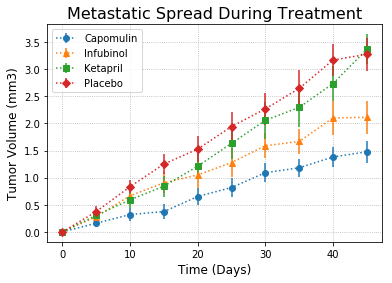

In [12]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()

ax.errorbar(mt_mean_table["Capomulin"].index, mt_mean_table["Capomulin"], yerr=mt_sems_table["Capomulin"], fmt="o",ls=":")
ax.errorbar(mt_mean_table["Infubinol"].index, mt_mean_table["Infubinol"], yerr=mt_sems_table["Infubinol"], fmt="^",ls=":")
ax.errorbar(mt_mean_table["Ketapril"].index, mt_mean_table["Ketapril"], yerr=mt_sems_table["Ketapril"], fmt="s",ls=":")
ax.errorbar(mt_mean_table["Placebo"].index, mt_mean_table["Placebo"], yerr=mt_sems_table["Placebo"], fmt="D",ls=":")

ax.set_xlabel("Time (Days)", fontsize=12)
ax.set_ylabel("Tumor Volume (mm3)", fontsize=12)
ax.set_title("Metastatic Spread During Treatment", fontsize=16)
ax.grid(linestyle=":")
plt.legend(("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=10)


# Save the Figure
plt.savefig("../Images/Metastatic_Spread_During_Treatment.png")

# Show the Figure
plt.show()


## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mc_count = grouped_by_two.count()

# Convert to DataFrame
mc_count = mc_count[["Mouse ID"]]
mc_count = mc_count.reset_index()

# Preview DataFrame
mc_count.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [14]:
# Minor Data Munging to Re-Format the Data Frames
mc_table = mc_count.pivot(values="Mouse ID", index="Timepoint", columns="Drug")

# Preview the Data Frame
mc_table.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


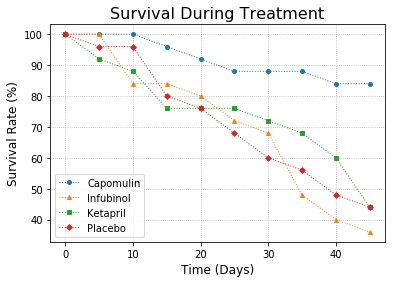

In [15]:
# Generate the Plot (Accounting for percentages)
capo = mc_table["Capomulin"] / 25 * 100
infu = mc_table["Infubinol"] / 25 * 100
keta = mc_table["Ketapril"] / 25 * 100
plac = mc_table["Placebo"] / 25 * 100


plt.plot(capo, marker="o", linestyle=":", linewidth=1, markersize=4)
plt.plot(infu, marker="^", linestyle=":", linewidth=1, markersize=4)
plt.plot(keta, marker="s", linestyle=":", linewidth=1, markersize=4)
plt.plot(plac, marker="D", linestyle=":", linewidth=1, markersize=4)

plt.xlabel("Time (Days)", fontsize=12)
plt.ylabel("Survival Rate (%)", fontsize=12)
plt.title("Survival During Treatment", fontsize=16)
plt.grid(linestyle=":")
plt.legend(("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=10, loc="best")


# Save the Figure
plt.savefig("../Images/Survival_During_Treatment.png")

# Show the Figure
plt.show()


## Summary Bar Graph

In [16]:
# Calculate the percent changes for each drug
# last_row = tr_table.ix[45]
sum_percent = (tr_mean_table.ix[45] - tr_mean_table.ix[0]) /tr_mean_table.ix[0] * 100

# Display the data to confirm
sum_percent 


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

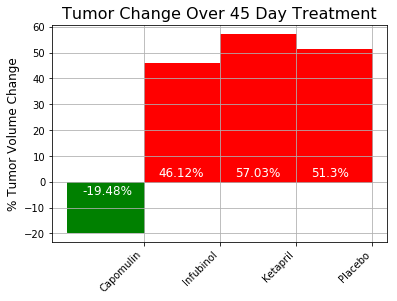

In [22]:
# Store all Relevant Percent Changes into a Tuple
capom,_,infub,ketap,_,place,_,_,_,_ = sum_percent

# Splice the data between passing and failing drugs
splice = [capom, infub, ketap, place]
passing = []
failing = []
for x in splice:
    if x < 0:
        passing.append(x)
    else:
        failing.append(x)

# Orient widths. Add labels, tick marks, etc.
# Use functions to label the percentages of changes
# Call functions to implement the function calls
sum_df = pd.DataFrame({"Drug":["Capomulin", "Infubinol", "Ketapril", "Placebo"],"Survival Rate":splice})

barlist = plt.bar(sum_df["Drug"], sum_df["Survival Rate"], align="edge",width=1)
plt.xticks(np.arange(1,len(sum_df)+1), sum_df["Drug"], rotation=45, ha="right")

barlist[0].set_color("g")
barlist[1].set_color("r")
barlist[2].set_color("r")
barlist[3].set_color("r")

plt.text(0.2, -5, str(round(capom,2))+"%", color="white", fontsize=12)
plt.text(1.2, 2, str(round(infub,2))+"%", color="white", fontsize=12)
plt.text(2.2, 2, str(round(ketap,2))+"%", color="white", fontsize=12)
plt.text(3.2, 2, str(round(place,2))+"%", color="white", fontsize=12)  
plt.ylabel("% Tumor Volume Change", fontsize=12)
plt.title("Tumor Change Over 45 Day Treatment", fontsize=16)
plt.grid(True)

# Save the Figure
plt.savefig("../Images/Tumor_Change_Over_45_Day_Treatment.png")

# Show the Figure
fig.show()